In [5]:
import numpy as np
import pandas as pd
from lxml import etree as et
import os.path, glob
import sqlite3
from sys import getsizeof
import tempfile
from datetime import datetime
import calendar

In [6]:
names = {
    'badges' : ['UserId', 'Name', 'Date'],
    'comments' : ['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserId'],
    'posts' : ['Id', 'PostTypeId', 'ParentID', 'AcceptedAnswerId', 'CreationDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
               'LastEditorUserId', 'LastEditorDisplayName', 'LastEditDate', 'LastActivityDate', 'CommunityOwnedDate', 'ClosedDate',
               'Title', 'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount'],
    'posthistory' : ['Id', 'PostHistoryTypeId', 'PostId', 'RevisionGUID', 'CreationDate', 'UserId', 'UserDisplayName', 
                     'Comment', 'Text', 'CloseReasonId'],
    'postlinks' : ['Id', 'CreationDate', 'PostId', 'RelatedPostId', 'PostLinkTypeId'],
    'users' : ['Id', 'Reputation', 'CreationDate', 'DisplayName', 'EmailHash', 'LastAccessDate', 'WebsiteUrl',
               'Location', 'Age', 'AboutMe', 'Views', 'UpVotes', 'DownVotes'],
    'votes' : ['PostId', 'VoteTypeId', 'CreationDate', 'UserId', 'BountyAmount'], 
    'tags' : ['Id', 'TagName', 'Count', 'ExcerptPostId', 'WikiPostId']}

In [7]:
conn = sqlite3.connect('pd3_py2563.db')

In [8]:
for stack in glob.glob("*.com"):
    stack_name = stack[:stack.find('.')]
    for xml in glob.glob(os.path.join(stack, "*.xml")):
        xml_name = xml[xml.find('.com') + 5:xml.find('.xml')].lower()
        col_names = names.get(xml_name)
        tree = et.parse(xml)
        root = tree.getroot()
        df = pd.DataFrame([[r.get(i) for i in col_names] for r in root], columns = col_names)
        #for c in df.columns:
        #   print(stack_name + ' ' + xml_name)
        #   df[c].astype(float, errors = 'ignore', copy = False)
        df.to_sql(stack_name[0] + '_' + xml_name, conn, index = False)  
        if stack_name == 'ell':
            if xml_name == 'badges':
                e_badges = df
            elif xml_name == 'comments':
                e_comments = df
            elif xml_name == 'posts':
                e_posts = df
            elif xml_name == 'posthistory':
                e_posthistory = df
            elif xml_name == 'postlinks':
                e_postslinks = df
            elif xml_name == 'users':
                e_users = df
            elif xml_name == 'votes':
                e_votes = df
            elif xml_name == 'tags':
                e_tags = df
        elif stack_name == 'movies':
            if xml_name == 'badges':
                m_badges = df
            elif xml_name == 'comments':
                m_comments = df
            elif xml_name == 'posts':
                m_posts = df
            elif xml_name == 'posthistory':
                m_posthistory = df
            elif xml_name == 'postlinks':
                m_postslinks = df
            elif xml_name == 'users':
                m_users = df
            elif xml_name == 'votes':
                m_votes = df
            elif xml_name == 'tags':
                m_tags = df      
        elif stack_name == 'politics':
            if xml_name == 'badges':
                p_badges = df
            elif xml_name == 'comments':
                p_comments = df
            elif xml_name == 'posts':
                p_posts = df
            elif xml_name == 'posthistory':
                p_posthistory = df
            elif xml_name == 'postlinks':
                p_postslinks = df
            elif xml_name == 'users':
                p_users = df
            elif xml_name == 'votes':
                p_votes = df
            elif xml_name == 'tags':
                p_tags = df
        

In [9]:
        for c in df.columns:
            df[c] = df[c].astype(float, errors = 'ignore')
            df[c] = df[c].astype(int, errors = 'ignore')
            if c.lower().find('date') > 0:
                df[c] = pd.to_datetime(df[c])

In [10]:
p_users.head()

,Id,Reputation,CreationDate,DisplayName,EmailHash,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2012-12-04T20:12:17.363,Community,None,2012-12-04T20:12:17.363,None,on the server farm,None,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",23,2,15
1,1,101,2012-12-04T20:30:56.000,Geoff Dalgas,None,2013-03-26T05:16:50.490,http://stackoverflow.com,"Corvallis, OR",None,<p>Developer on the Stack Overflow team. Find...,3,0,0
2,2,100,2012-12-04T20:34:24.000,Adam Lear,None,2017-06-19T19:39:56.960,None,"New York, NY",None,\n\n<p>Developer at Stack Overflow. Canadian w...,12,7,0
3,3,101,2012-12-04T20:34:26.000,Jaydles,None,2013-08-30T15:51:06.383,https://blog.stackexchange.com/authors/jhanlon/,"New York, NY, United States",None,<p>I am: </p>\n\n<ul>\n<li>EVP of Culture and...,0,1,0
4,5,304,2012-12-04T20:36:06.000,Robert Cartaino,None,2018-04-04T13:30:53.130,None,"Palm Bay, FL",None,"<p><a href=""http://blog.stackoverflow.com/2010...",24,15,8


In [11]:
p_badges.head(2)

,UserId,Name,Date
0,1,Autobiographer,2012-12-04T21:34:12.180
1,10,Autobiographer,2012-12-04T21:34:12.180


In [12]:
p_comments.head(2)

,Id,PostId,Score,Text,CreationDate,UserId
0,1,2,0,The concern is that meta tags are loosely defi...,2012-12-04T22:13:16.067,20
1,2,2,1,"I agree, a better question would be how locali...",2012-12-04T22:13:52.037,38


In [13]:
p_posts.head(2)

,Id,PostTypeId,ParentID,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,ClosedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,1,1,None,2,2012-12-04T21:57:33.980,8,90,<p>Some questions on this site are likely to b...,20,None,None,None,2012-12-05T13:51:40.713,None,None,How should we tag country-specific questions?,<discussion><tags>,3,1,1
1,2,2,None,None,2012-12-04T22:10:56.127,17,None,<p>I'm not sure those are actually meta tags i...,8,None,None,None,2012-12-04T22:10:56.127,None,None,None,None,None,5,None


In [14]:
p_posthistory.head(2)

,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,UserDisplayName,Comment,Text,CloseReasonId
0,1,2,1,a64f186c-5925-4801-9b94-4f278ae96df3,2012-12-04T21:57:33.980,20,None,None,Some questions on this site are likely to be s...,None
1,2,1,1,a64f186c-5925-4801-9b94-4f278ae96df3,2012-12-04T21:57:33.980,20,None,None,How should we tag country-specific questions?,None


In [15]:
p_postslinks.head(2)

,Id,CreationDate,PostId,RelatedPostId,PostLinkTypeId
0,18,2012-12-04T23:06:56.450,7,14,None
1,82,2012-12-05T10:21:19.943,40,3,None


In [16]:
p_users.head(2)

,Id,Reputation,CreationDate,DisplayName,EmailHash,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2012-12-04T20:12:17.363,Community,None,2012-12-04T20:12:17.363,None,on the server farm,None,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",23,2,15
1,1,101,2012-12-04T20:30:56.000,Geoff Dalgas,None,2013-03-26T05:16:50.490,http://stackoverflow.com,"Corvallis, OR",None,<p>Developer on the Stack Overflow team. Find...,3,0,0


In [17]:
p_votes.head(2)

,PostId,VoteTypeId,CreationDate,UserId,BountyAmount
0,1,2,2012-12-04,NaN,NaN
1,1,2,2012-12-04,NaN,NaN


In [18]:
p_tags.head(2)

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,bug,14,None,None
1,2,feature-request,30,None,None


In [19]:
p_tags.iloc[:,1].describe()

count           86
unique          86
top       markdown
freq             1
Name: TagName, dtype: object

In [20]:
e_users.head(2)

,Id,Reputation,CreationDate,DisplayName,EmailHash,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2013-01-23T19:59:06.150,Community,None,2013-01-23T19:59:06.150,http://meta.stackexchange.com/,on the server farm,None,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",0,10590,10305
1,1,101,2013-01-23T20:13:47.453,Geoff Dalgas,None,2014-09-22T17:44:09.233,http://stackoverflow.com,"Corvallis, OR",None,<p>Developer on the Stack Overflow team. Find...,3127,0,0


In [21]:
p_users.head(2)

,Id,Reputation,CreationDate,DisplayName,EmailHash,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
0,-1,1,2012-12-04T20:12:17.363,Community,None,2012-12-04T20:12:17.363,None,on the server farm,None,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",23,2,15
1,1,101,2012-12-04T20:30:56.000,Geoff Dalgas,None,2013-03-26T05:16:50.490,http://stackoverflow.com,"Corvallis, OR",None,<p>Developer on the Stack Overflow team. Find...,3,0,0


In [22]:
pd.merge(p_users, e_users, right_on=["DisplayName","Location", "AboutMe"], left_on=["DisplayName","Location", "AboutMe"]).loc[:,["DisplayName","Id_x","Id_y"]].head()

,DisplayName,Id_x,Id_y
0,Community,-1,-1
1,Geoff Dalgas,1,1
2,Adam Lear,2,16
3,Jaydles,3,17
4,Robert Cartaino,5,48


In [23]:
e_users.iloc[:,7][1].rfind(" ")

10

In [24]:
USAstates = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "USA", "US", "NYC", "NY", "New York", "USA", "United States", "United States of America",
            "Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

adres = "https://en.wikipedia.org/wiki/United_States"
res = pd.read_html(adres)
USAcities=list(res[2].iloc[2:21,1])
USAcities[5]='Washington'
USA=USAstates+USAcities


In [25]:
adres = "https://en.wikipedia.org/wiki/Europe"
res = pd.read_html(adres)
europe=res[2].loc[1:50,[2,6,7]]
europe.columns=["English", "Capital", "Native"]
europe.iloc[48,2]="GB/UK/United Kingdom/England/Scotland/Ireland/Wales"
europe["English"]=[p[0:p.find("[")-1] if p.find("[")!=-1 else p for p in europe.loc[:,"English"]]

In [26]:
adres = "https://en.wikipedia.org/wiki/Asia"
res = pd.read_html(adres)
asia=res[5].loc[:,[2,5]].loc[1:,:]
asia.columns=["country","city"]
asia["country"]=[p[0:p.find("[")] if p.find("[")!=-1 else p for p in asia.loc[:,"country"]]
asia.iloc[8,0]="China"
asia.iloc[43,0]="Taiwan"

In [27]:
asia

,country,city
1,Afghanistan,Kabul
2,Armenia,Yerevan
3,Azerbaijan,Baku
4,Bahrain,Manama
5,Bangladesh,Dhaka
6,Bhutan,Thimphu
7,Brunei,Bandar Seri Begawan
8,Cambodia,Phnom Penh
9,China,Beijing
10,Cyprus,Nicosia


In [28]:
country=[p[p.rfind(",")+1:].lstrip().rstrip() if type(p)==str else p for p in e_users.iloc[:,7]]
e_users["country"]=country
e_users.groupby("country").size().sort_values(ascending = False).head(18)

country
India             3142
United States     1693
United Kingdom     982
Germany            737
Russia             637
USA                599
Canada             540
Brazil             499
France             485
China              430
Australia          428
Iran               398
Ukraine            315
CA                 288
UK                 284
Italy              267
Poland             254
Pakistan           247
dtype: int64

In [29]:

#to bedzie mozna jakos lepiej zrobic
country2=[0]*len(country)
for i in range(len(country)):
    if country[i] == None:
        country2[i]= None
    elif (country[i] in USA) or (sum([p in country[i] for p in USA])>0):
        country2[i]='USA'
    else:
        test=list()
        test2=list()
        test3_asia=list()
        test4_asia=list()
        for j in range(europe.shape[0]):
            test.append((country[i] in europe.iloc[j,1])+(country[i] in europe.iloc[j,2]))
            test2.append((europe.iloc[j,1] in country[i])+sum([(p in country[i]) for p in europe.iloc[j,2].replace("("," ").replace(")","").replace("/"," ").split()if p!='i'])+ (europe.iloc[j,0] in country[i]))
        for j in range(asia.shape[0]):
            test3_asia.append((country[i] in asia.iloc[j,0])+(country[i] in asia.iloc[j,1]))
            test4_asia.append((asia.iloc[j,0] in country[i])+sum([(p in country[i]) for p in asia.iloc[j,1].replace("("," ").replace(")","").replace("/"," ").split()if p!='i']))
        if sum(test)==0 and sum(test2)==0 and sum(test3_asia)==0 and sum(test4_asia)==0:
            country2[i]=country[i]
        else:
            if sum(test)>0:
                country2[i]=europe.iloc[test.index(max(test)),0]
            elif sum(test2)>0:
                country2[i]=europe.iloc[test2.index(max(test2)),0]
            elif sum(test3_asia)>0:
                country2[i]=asia.iloc[test3_asia.index(max(test3_asia)),0]
            elif sum(test4_asia)>0:
                country2[i]=asia.iloc[test4_asia.index(max(test4_asia)),0]

In [30]:
e_users["country"]=country2
e_users.groupby("country").size().sort_values(ascending = False).head(50)

country
USA               4608
India             3342
United Kingdom    1474
Germany            855
Russia             754
Canada             540
France             509
Brazil             499
China              471
Australia          428
Iran               426
Ukraine            333
Italy              332
Poland             323
Netherlands        313
Spain              292
Turkey             291
Pakistan           250
Bangladesh         234
Japan              230
Brasil             203
Vietnam            183
Switzerland        160
Indonesia          157
Egypt              153
Sweden             153
Belgium            143
Czech Republic     131
Sri Lanka          129
Israel             126
South Korea        116
Ireland            116
Argentina          112
Romania            105
Taiwan             104
Earth              102
Singapore           99
Mexico              99
Hungary             97
Denmark             95
Philippines         94
Malaysia            86
Austria             85
Tha

In [31]:
country=[p[p.rfind(",")+1:].lstrip().rstrip() if p!=None else p for p in p_users.iloc[:,7]]
p_users["country"]=country
p_users.groupby("country").size().sort_values(ascending = False).head(18)    

country
United States     197
United Kingdom     95
Germany            56
USA                54
Canada             39
India              38
Australia          37
UK                 29
Netherlands        27
France             20
CA                 19
California         18
Poland             16
TX                 16
Russia             15
NY                 14
Italy              12
WA                 12
dtype: int64

In [32]:

#to bedzie mozna jakos lepiej zrobic
country2=[0]*len(country)
for i in range(len(country)):
    if country[i] == None:
        country2[i]= None
    elif (country[i] in USA) or (sum([p in country[i] for p in USA])>0):
        country2[i]='USA'
    else:
        test=list()
        test2=list()
        test3_asia=list()
        test4_asia=list()
        for j in range(europe.shape[0]):
            test.append((country[i] in europe.iloc[j,1])+(country[i] in europe.iloc[j,2]))
            test2.append((europe.iloc[j,1] in country[i])+sum([(p in country[i]) for p in europe.iloc[j,2].replace("("," ").replace(")","").replace("/"," ").split()if p!='i'])+ (europe.iloc[j,0] in country[i]))
        for j in range(asia.shape[0]):
            test3_asia.append((country[i] in asia.iloc[j,0])+(country[i] in asia.iloc[j,1]))
            test4_asia.append((asia.iloc[j,0] in country[i])+sum([(p in country[i]) for p in asia.iloc[j,1].replace("("," ").replace(")","").replace("/"," ").split()if p!='i']))
        if sum(test)==0 and sum(test2)==0 and sum(test3_asia)==0 and sum(test4_asia)==0:
            country2[i]=country[i]
        else:
            if sum(test)>0:
                country2[i]=europe.iloc[test.index(max(test)),0]
            elif sum(test2)>0:
                country2[i]=europe.iloc[test2.index(max(test2)),0]
            elif sum(test3_asia)>0:
                country2[i]=asia.iloc[test3_asia.index(max(test3_asia)),0]
            elif sum(test4_asia)>0:
                country2[i]=asia.iloc[test4_asia.index(max(test4_asia)),0]

In [33]:
p_users["country"]=country2
p_users.groupby("country").size().sort_values(ascending = False).head(28)  

country
USA               506
United Kingdom    138
Germany            64
India              50
Canada             39
Australia          37
Netherlands        33
France             21
Russia             18
Poland             16
Italy              14
Sweden             12
Earth              10
Finland             9
Europe              9
Switzerland         9
Brazil              8
Japan               8
Czech Republic      8
Iran                8
Spain               8
Turkey              7
Israel              7
Denmark             6
Norway              6
Ukraine             6
Romania             6
Belgium             6
dtype: int64

In [34]:
country=[p[p.rfind(",")+1:].lstrip().rstrip() if p!=None else p for p in m_users.iloc[:,7]]
m_users["country"]=country
m_users.groupby("country").size().sort_values(ascending = False).head(18)    

country
United States     336
India             330
United Kingdom    232
Germany           128
Canada            100
USA                92
Australia          84
France             67
Netherlands        53
UK                 52
CA                 43
Italy              35
NY                 32
Belgium            32
Poland             31
Brazil             30
Russia             27
Sweden             26
dtype: int64

In [35]:
#to bedzie mozna jakos lepiej zrobic
country2=[0]*len(country)
for i in range(len(country)):
    if country[i] == None:
        country2[i]= None
    elif (country[i] in USA) or (sum([p in country[i] for p in USA])>0):
        country2[i]='USA'
    else:
        test=list()
        test2=list()
        test3_asia=list()
        test4_asia=list()
        for j in range(europe.shape[0]):
            test.append((country[i] in europe.iloc[j,1])+(country[i] in europe.iloc[j,2]))
            test2.append((europe.iloc[j,1] in country[i])+sum([(p in country[i]) for p in europe.iloc[j,2].replace("("," ").replace(")","").replace("/"," ").split()if p!='i'])+ (europe.iloc[j,0] in country[i]))
        for j in range(asia.shape[0]):
            test3_asia.append((country[i] in asia.iloc[j,0])+(country[i] in asia.iloc[j,1]))
            test4_asia.append((asia.iloc[j,0] in country[i])+sum([(p in country[i]) for p in asia.iloc[j,1].replace("("," ").replace(")","").replace("/"," ").split()if p!='i']))
        if sum(test)==0 and sum(test2)==0 and sum(test3_asia)==0 and sum(test4_asia)==0:
            country2[i]=country[i]
        else:
            if sum(test)>0:
                country2[i]=europe.iloc[test.index(max(test)),0]
            elif sum(test2)>0:
                country2[i]=europe.iloc[test2.index(max(test2)),0]
            elif sum(test3_asia)>0:
                country2[i]=asia.iloc[test3_asia.index(max(test3_asia)),0]
            elif sum(test4_asia)>0:
                country2[i]=asia.iloc[test4_asia.index(max(test4_asia)),0]

In [36]:
m_users["country"]=country2
m_users.groupby("country").size().sort_values(ascending = False).head(28)  

country
USA               952
India             357
United Kingdom    320
Germany           150
Canada            100
Australia          84
France             71
Netherlands        66
Belgium            39
Italy              37
Poland             34
Brazil             30
Russia             27
Sweden             27
Earth              25
Spain              24
Ireland            23
Pakistan           20
Switzerland        20
Turkey             18
Romania            18
Iran               17
Czech Republic     17
Sri Lanka          17
Norway             15
Greece             14
Hungary            14
South Africa       14
dtype: int64

In [37]:
for p in range(e_tags.shape[0]):
    e_tags.Count[p]=int(e_tags.Count[p])

In [38]:
e_tags.sort_values(by="Count", ascending = False).head(49)

,Id,TagName,Count,ExcerptPostId,WikiPostId
6,10,grammar,5623,307,306
7,11,meaning,5355,86,85
1,4,word-usage,5043,82,81
39,54,meaning-in-context,4882,678,677
25,34,word-choice,3836,662,661
26,35,prepositions,3242,538,537
96,153,sentence-construction,2788,4347,4346
161,270,word-meaning,2412,76732,76731
159,266,phrase-meaning,2254,60892,60891
17,23,word-request,2181,765,764


In [39]:
for p in range(m_tags.shape[0]):
    m_tags.Count[p]=int(m_tags.Count[p])

In [40]:
m_tags.sort_values(by="Count", ascending = False).head(49)

,Id,TagName,Count,ExcerptPostId,WikiPostId
2,3,discussion,843,1013,1012
12,13,support,192,None,None
15,16,tags,152,1437,1436
65,76,scope,138,2320,2319
4,5,status-completed,111,None,None
86,131,scheduled-event,87,2623,2622
82,127,challenge,81,None,None
71,84,identify,72,1435,1434
1,2,feature-request,71,None,None
0,1,bug,59,None,None


In [41]:
e_posts["Weekday"]=[list(calendar.day_name)[pd.to_datetime(p).weekday()] for p in e_posts.CreationDate]

In [42]:
Questions = e_posts.loc[e_posts.PostTypeId=='1'].reset_index()

In [43]:
Questions["TagList"]=[p.replace("<","").replace(">"," ").lstrip().rstrip().split(" ") for p in Questions.Tags]

In [44]:
e_tags.head()

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,questions,681,299,298
1,4,word-usage,5043,82,81
2,5,ambiguity,222,531,530
3,6,phrases,708,536,535
4,8,synonyms,359,550,549


In [45]:
Questions["Weekend"]=[True if p in ["Saturday", "Sunday"] else False for p in Questions.Weekday]

In [46]:
tags=list()
id=list()
for i in range(Questions.shape[0]):
    tags=tags+Questions.TagList[i]
    id=id+[Questions.Id[i]]*len(Questions.TagList[i])

In [47]:
x=pd.DataFrame(id,tags).reset_index()

In [48]:
x.columns=["tag","Id"]

In [49]:
Questions2=pd.merge(x,Questions,left_on="Id", right_on="Id")

In [50]:
z=Questions2.groupby(["tag","Weekend"]).size().unstack()

In [51]:
z.columns=["F", "T"]

In [52]:
z.sort_values(by="F",ascending=False).iloc[:20,0] #w dni tygodnia

tag
grammar                  4164.0
meaning                  3935.0
word-usage               3785.0
meaning-in-context       3631.0
word-choice              2868.0
prepositions             2415.0
sentence-construction    2112.0
word-meaning             1780.0
phrase-meaning           1682.0
word-request             1640.0
sentence-meaning         1356.0
grammaticality           1248.0
tense                    1232.0
difference               1213.0
phrase-usage             1182.0
articles                 1172.0
verbs                    1127.0
phrase-request            914.0
past-tense                861.0
idioms                    859.0
Name: F, dtype: float64

In [53]:
z.sort_values(by="T",ascending=False).iloc[:20,1] #w weekend, w sumie nie ma roznicy 

tag
grammar                  1460.0
meaning                  1420.0
word-usage               1257.0
meaning-in-context       1250.0
word-choice               968.0
prepositions              827.0
sentence-construction     676.0
word-meaning              632.0
phrase-meaning            572.0
word-request              541.0
sentence-meaning          511.0
tense                     463.0
grammaticality            424.0
phrase-usage              415.0
articles                  398.0
difference                356.0
verbs                     344.0
phrase-request            306.0
idioms                    298.0
modal-verbs               283.0
Name: T, dtype: float64

In [54]:
e_tags.sort_values(by="Count", ascending=False).head(50)

,Id,TagName,Count,ExcerptPostId,WikiPostId
6,10,grammar,5623,307,306
7,11,meaning,5355,86,85
1,4,word-usage,5043,82,81
39,54,meaning-in-context,4882,678,677
25,34,word-choice,3836,662,661
26,35,prepositions,3242,538,537
96,153,sentence-construction,2788,4347,4346
161,270,word-meaning,2412,76732,76731
159,266,phrase-meaning,2254,60892,60891
17,23,word-request,2181,765,764


In [55]:
k=pd.merge(Questions2,e_users,left_on="OwnerUserId", right_on="Id")

In [56]:
countries=k.groupby(by="country").size().sort_values(ascending=False).index[0:10]

In [57]:
country_tag_group=k.groupby(["country","tag"]).size().unstack().reset_index()

In [58]:
#for p in europe.iloc[:,0]:
lista=list()
lista2=list()
for p in countries:
    pol_tag=country_tag_group.loc[country_tag_group.country.values==p].reset_index().iloc[0,1:].reset_index()
    pol_tag.columns=["tag","numb"]
    lista2.append(pol_tag)
    lista.append(pol_tag.loc[1:,].sort_values(by="numb",ascending=False).iloc[0:5,])
tagi_mapa=list()
for i in range(len(countries)):
               tagi_mapa=tagi_mapa+list(lista[i].tag)
tagi=list(set(tagi_mapa)) #tagi, ktore pojawiaja sie powyzej
mapa=pd.DataFrame(np.r_[[0]*len(countries)*len(tagi)].reshape(len(countries),len(tagi)))
mapa.columns=tagi
mapa.index=countries


In [59]:
for p in range(len(countries)):
    for t in tagi:
        if np.isnan(lista2[p].loc[lista2[p].tag==t,'numb'].iloc[0])==False:
            mapa.loc[countries[p],t]=lista2[p].loc[lista2[p].tag==t,'numb'].iloc[0]

In [60]:
mapa

,sentence-construction,pronunciation,grammar,phrase-meaning,meaning-in-context,difference,meaning,phrase-request,word-request,word-choice,vocabulary,modal-verbs,word-usage,prepositions,tense,articles
country,,,,,,,,,,,,,,,,
India,165.0,13.0,178.0,76.0,129.0,40.0,113.0,46.0,141.0,173.0,17.0,19.0,275.0,109.0,53.0,42.0
Russia,26.0,21.0,85.0,74.0,77.0,98.0,85.0,55.0,87.0,76.0,15.0,68.0,88.0,90.0,35.0,140.0
USA,81.0,40.0,64.0,66.0,129.0,34.0,113.0,33.0,59.0,70.0,13.0,15.0,97.0,68.0,17.0,57.0
Iran,98.0,2.0,58.0,56.0,68.0,62.0,79.0,90.0,81.0,88.0,9.0,11.0,112.0,62.0,21.0,28.0
China,37.0,23.0,80.0,58.0,155.0,30.0,74.0,12.0,32.0,37.0,5.0,60.0,81.0,79.0,34.0,9.0
Korea (South),7.0,55.0,9.0,21.0,69.0,5.0,41.0,0.0,1.0,3.0,164.0,60.0,0.0,25.0,56.0,22.0
Ukraine,4.0,8.0,53.0,18.0,110.0,32.0,149.0,6.0,14.0,34.0,2.0,7.0,35.0,44.0,7.0,80.0
Italy,31.0,21.0,11.0,13.0,41.0,18.0,32.0,30.0,25.0,46.0,14.0,15.0,48.0,27.0,16.0,5.0
Australia,18.0,4.0,37.0,30.0,35.0,27.0,53.0,10.0,23.0,41.0,4.0,6.0,54.0,38.0,11.0,14.0


In [61]:
import seaborn as sns

In [62]:
import plotly

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

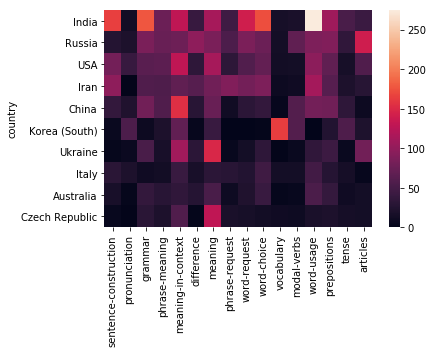

In [63]:
ax = sns.heatmap(mapa)

In [64]:
import parula as par
import matplotlib
from matplotlib import cm
import numpy as np

magma_cmap = matplotlib.cm.get_cmap('magma')
viridis_cmap = matplotlib.cm.get_cmap('viridis')
parula_cmap = par.parula_map

viridis_rgb = []
magma_rgb = []
parula_rgb = []
norm = matplotlib.colors.Normalize(vmin=0, vmax=255)

for i in range(0, 255):
       k = matplotlib.colors.colorConverter.to_rgb(magma_cmap(norm(i)))
       magma_rgb.append(k)

for i in range(0, 255):
       k = matplotlib.colors.colorConverter.to_rgb(viridis_cmap(norm(i)))
       viridis_rgb.append(k)

for i in range(0, 255):
       k = matplotlib.colors.colorConverter.to_rgb(parula_cmap(norm(i)))
       parula_rgb.append(k)

def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

magma = matplotlib_to_plotly(magma_cmap, 255)
viridis = matplotlib_to_plotly(viridis_cmap, 255)
parula = matplotlib_to_plotly(parula_cmap, 255)

import plotly.plotly as py
import numpy as np
import os
import plotly.graph_objs as go
from plotly import tools

def heatmap_plot(colorscale, title):
    example_dir = os.path.join(os.path.dirname('__file__'), "examples")

    hist2d = np.loadtxt(os.path.join(example_dir, "hist2d.txt"))
    trace1 = go.Heatmap(z=hist2d, colorscale=colorscale, showscale=False)

    st_helens = np.loadtxt(os.path.join(example_dir,
                                        "st-helens_before-modified.txt.gz")).T
    trace2 = go.Heatmap(z=st_helens, colorscale=colorscale, y0=-5, x0=-5)

    dx = dy = 0.05
    y, x = np.mgrid[-5 : 5 + dy : dy, -5 : 10 + dx : dx]
    z = np.sin(x)**10 + np.cos(10 + y*x) + np.cos(x) + 0.2*y + 0.1*x
    trace3 = go.Heatmap(z=z, colorscale=colorscale, showscale=False)

    fig = tools.make_subplots(rows=1, cols=3, print_grid=False)
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 3)
    fig['layout'].update(title=title)
    fig['layout']['xaxis2'].update(range=[0, 450])
    fig['layout']['yaxis2'].update(range=[0, 270])

    return fig
py.iplot(heatmap_plot(colorscale=magma, title='MAGMA'))

ModuleNotFoundError: No module named 'parula'

In [64]:
import plotly.plotly as py
plotly.tools.set_credentials_file(username='asiacz', api_key='Fd7M4iS81fCCLQyiiJb3')
import plotly.graph_objs as go

trace = go.Heatmap(=np.array(mapa),
                   x=list(mapa.columns),
                   y=list(mapa.index))
data=[trace]
py.iplot(data, filename='labelled-heatmap')


In [ ]:
e_users.groupby("country").size().sort_values(ascending = False).head(50) #liczba uzytkownikow w zaleznosci od kraju

In [ ]:
pd.merge(e_posts, e_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).head(20)
#liczba postow z danego kraju

In [ ]:
pd.merge(e_posts.loc[e_posts.PostTypeId.values=='1'], e_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).head(20) 
#liczba pytan z danego kraju

In [ ]:
pd.merge(e_posts.loc[e_posts.PostTypeId.values=='2'], e_users, left_on="OwnerUserId", right_on="Id").groupby(by="country").size().sort_values(ascending=False).head(20) 
#liczba odpowiedzi z danego kraju

In [ ]:
Questions2.loc[Questions2.tag.values=='present-tense'].shape[0]

In [ ]:
Questions2.loc[Questions2.tag.values=='past-tense'].shape[0]

In [ ]:
Questions2.loc[Questions2.tag.values=='future-tense'].shape[0]

In [ ]:
tenses=['present-perfect',
'present-continuous',
'present-simple',
'present-perfect-progressive',
'past-perfect',
'past-continuous',
'past-simple',
'past-perfect-continuous',
'future-perfect',
'future-continuous']

In [ ]:
#popularnosc czasow
for p in tenses:
    print(p)
    print(Questions2.loc[Questions2.tag.values==p].shape[0])

In [ ]:
year_all=list()
for i in e_posts.CreationDate:
    year_all.append(pd.to_datetime(i).year)
year_all=pd.DataFrame(year)

In [ ]:
year_all.columns=["year"]

In [ ]:
year_all_summary=year_all.groupby("year").size() #liczba postow w podziale na lata

In [ ]:
year_Q=list()
for i in e_posts.loc[e_posts.PostTypeId.values=='1'].CreationDate:
    year.append(pd.to_datetime(i).year)
year_Q=pd.DataFrame(year)
year_Q.columns=["year"]
year_Q.groupby("year").size() #liczba pytan w podziale na lata

In [ ]:
year_A=list()
for i in e_posts.loc[e_posts.PostTypeId.values=='2'].CreationDate:
    year_A.append(pd.to_datetime(i).year)
year_A=pd.DataFrame(year)
year_A.columns=["year"]
year_A.groupby("year").size() #liczba odpowiedzi w podziale na lata

In [ ]:
month=list()
year=list()
for i in e_posts.CreationDate:
    month.append(pd.to_datetime(i).month)
    year.append(pd.to_datetime(i).year)
time=pd.DataFrame(year,month).reset_index()
time.columns=["month","year"]


In [ ]:
summary=time.groupby(["year","month"]).size().unstack()

In [ ]:
for i in range(summary.shape[0]):
    summary.iloc[i,:]=summary.iloc[i,:]/year_all_summary.iloc[i]

In [ ]:
summary

In [ ]:
summary=summary*100

In [ ]:
summary.mean() #jaki procent pytan jest srednio zadawany w danym miesiacu

In [ ]:
sum(['yo' in p for p in e_users.AboutMe if p !=None])

In [ ]:
sum([ True for p in e_users.AboutMe if p !=None])

In [ ]:
x=list([p.find("years") if p !=None else -2 for p in e_users.AboutMe])

In [ ]:
adres = "https://en.wikipedia.org/wiki/List_of_actors_with_Academy_Award_nominations"
res = pd.read_html(adres)

In [ ]:
actors=[p.split(" ") for p in res[1].loc[1:,0]]
surnames=[actors[i][-1].lower() for i in range(len(actors))]
counts=pd.DataFrame([sum([p in m for m in m_posts.Body]) for p in surnames],surnames).reset_index()
counts.columns=["surname", "count"]
counts.sort_values(by="count", ascending=False).head(50) #liczba wystopien nazwisk aktorow nominowanych do Oscarow w postach, ale czy na pewno nazwisk..

In [ ]:
Questions2["ViewCount"]=[int(i)for i in Questions2.ViewCount]
Questions2.groupby("tag")["ViewCount"].agg(np.sum).reset_index().sort_values(by="ViewCount", ascending=False)

In [ ]:
Questions["ViewCount"]=[int(i) for i in Questions.ViewCount]


In [ ]:
Questions.sort_values(by="ViewCount", ascending=False).Body[0]

In [28]:
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = list([1,2,2,4,5])
y = np.random.rand(5)
z = np.random.rand(5)
 
# pimp your plot with the seaborn style
import seaborn as sns
plt.scatter(x, y, s=z*4000, c="green", alpha=0.4, linewidth=6)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A bubble plot", loc="left")
plt.show()



<Figure size 640x480 with 1 Axes>

In [29]:
plt

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [12]:
t=e_posthistory

In [14]:

import re
t = t.loc[:,['Id','Text']]
t["Text_new"] = t["Text"].apply(lambda x: re.sub(r'(?<=<)(.*)(?=>)', '', str(x)).replace('<>', ''))
t = t[t.Text_new != '']
t = t[t.Text_new != 'nan']
t = t.reset_index(drop = True)
t = t.Text



In [27]:
sum(["Id display" in p for p in list(t) if p!=None])

0

In [2]:
import plotly